In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
from astra import Astra

from ipywidgets import interact


import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12,8)
%config InlineBackend.figure_format = 'retina'

In [3]:
A = Astra.from_yaml('astra.yaml')

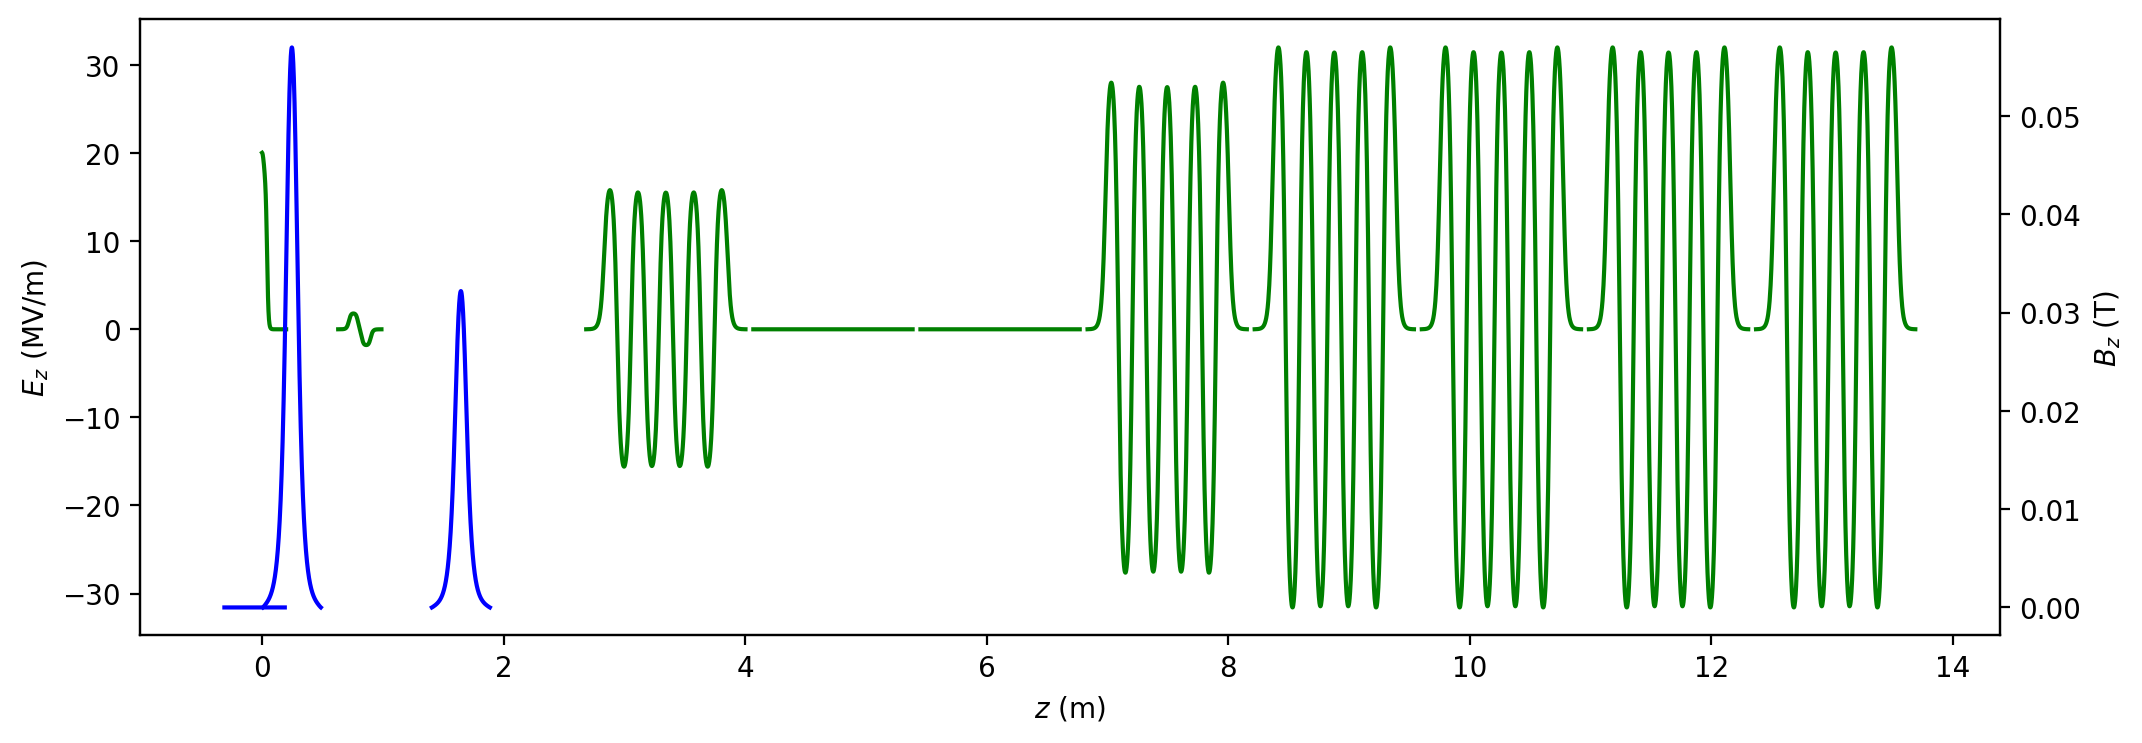

In [4]:
A.plot()

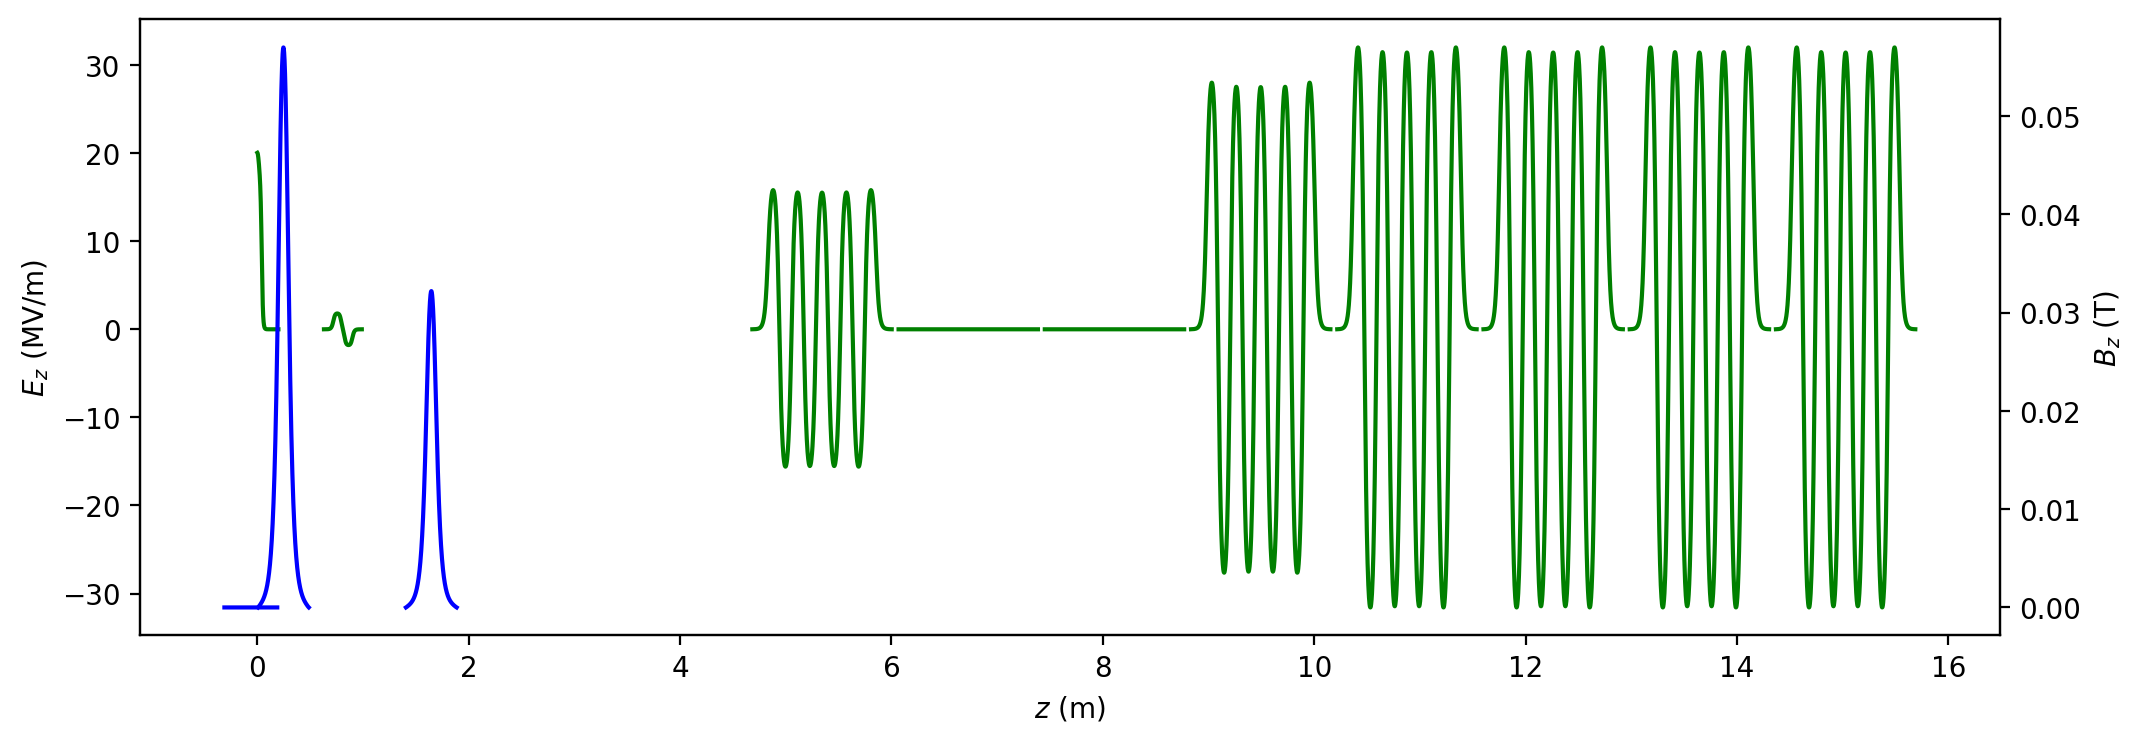

In [5]:
A['cryomodule:offset'] = 2
A.plot()

interactive(children=(FloatSlider(value=1.0, description='x', max=3.0, step=0.01), Output()), _dom_classes=('w…

<function __main__.f(x)>

In [6]:
from ipywidgets import interact, interactive

def f(x):
    A['cryomodule:offset'] = x
    A.plot(xlim=(0,20))
iplot = interactive(f, x=(0,3, .01))
out = iplot.children[-1]
out.layout.height='350px'
iplot

interactive(children=(FloatSlider(value=1.0, description='x', max=3.0, step=0.01), Output(layout=Layout(height…

In [7]:
from astra.astra_distgen import run_astra_with_distgen, evaluate_astra_with_distgen

In [8]:
A.input['output']

{'zstart': 0,
 'zstop': 15,
 'zemit': 1000,
 'zphase': 1,
 'screen(1)': 1.490314,
 'screen(2)': 3.862,
 'screen(3)': 5.245,
 'screen(4)': 6.629,
 'lmagnetized': True,
 'lsub_rot': False,
 'lproject_emit': False,
 'larmors': False,
 'emits': True,
 'c_emits': True,
 'landfs': True,
 'phases': True,
 'tracks': True,
 'refs': True,
 'tchecks': False,
 'cathodes': True,
 'high_res': True}

In [9]:
settings = {'zstop':15, 'lspch':False, 'distgen:n_particle':100, 'cryomodule:offset':2}
A2 = run_astra_with_distgen(settings, astra_input_file='astra.yaml', distgen_input_file='distgen.yaml', verbose=False)

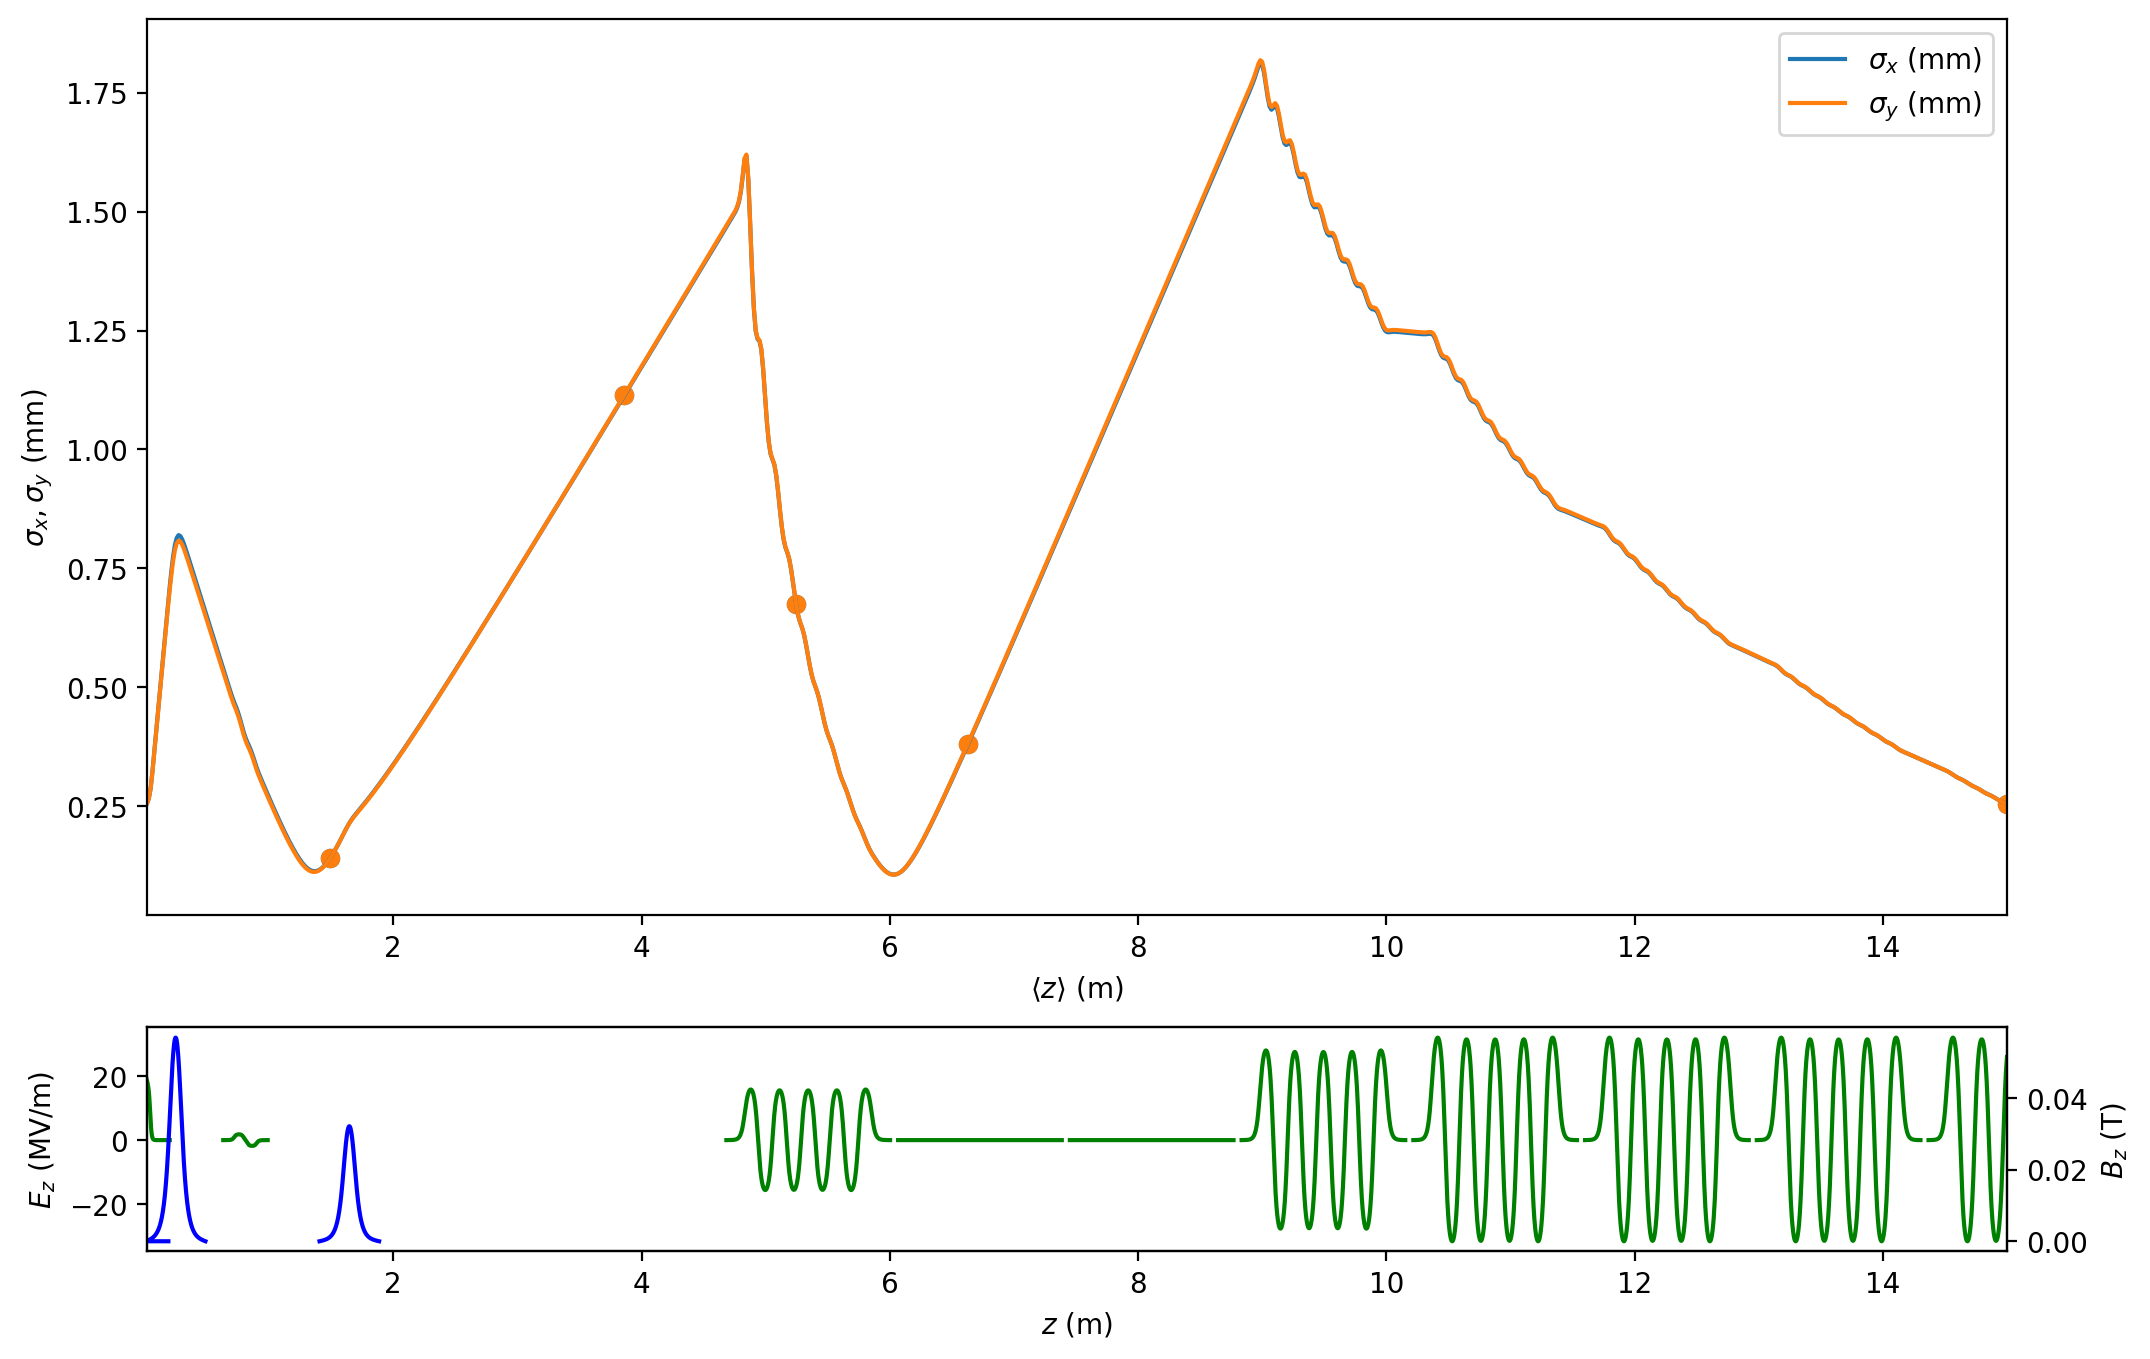

In [10]:
A2.plot()

In [11]:
evaluate_astra_with_distgen(settings, astra_input_file='astra.yaml', distgen_input_file='distgen.yaml', verbose=False)

{'error': False,
 'end_mean_z': 15.0,
 'end_norm_emit_x': 1.0064999999999998e-06,
 'end_core_emit_95percent_x': 7.7815e-07,
 'end_core_emit_90percent_x': 6.2095e-07,
 'end_core_emit_80percent_x': 3.8185e-07,
 'end_norm_emit_y': 1.0522e-06,
 'end_core_emit_95percent_y': 7.7734e-07,
 'end_core_emit_90percent_y': 6.2248e-07,
 'end_core_emit_80percent_y': 3.9852999999999996e-07,
 'end_norm_emit_z': 4307.9,
 'end_core_emit_95percent_z': 0.0027501999999999995,
 'end_core_emit_905percent_z': 0.0020096,
 'end_core_emit_80percent_z': 0.001339,
 'end_mean_t': 5.1570000000000005e-08,
 'end_mean_x': 2.5044e-07,
 'end_sigma_x': 0.00025459,
 'end_sigma_xp': 0.00014366000000000002,
 'end_cov_x__xp': -3.6062673500000004e-08,
 'end_mean_y': 3.4249e-07,
 'end_sigma_y': 0.00025444,
 'end_sigma_yp': 0.000144,
 'end_cov_y__yp': -3.6082136399999996e-08,
 'end_mean_kinetic_energy': 83868000.0,
 'end_sigma_z': 0.004772800000000001,
 'end_sigma_energy': 938400.0,
 'end_cov_z__energy': 1225.4164,
 'end_n_partic

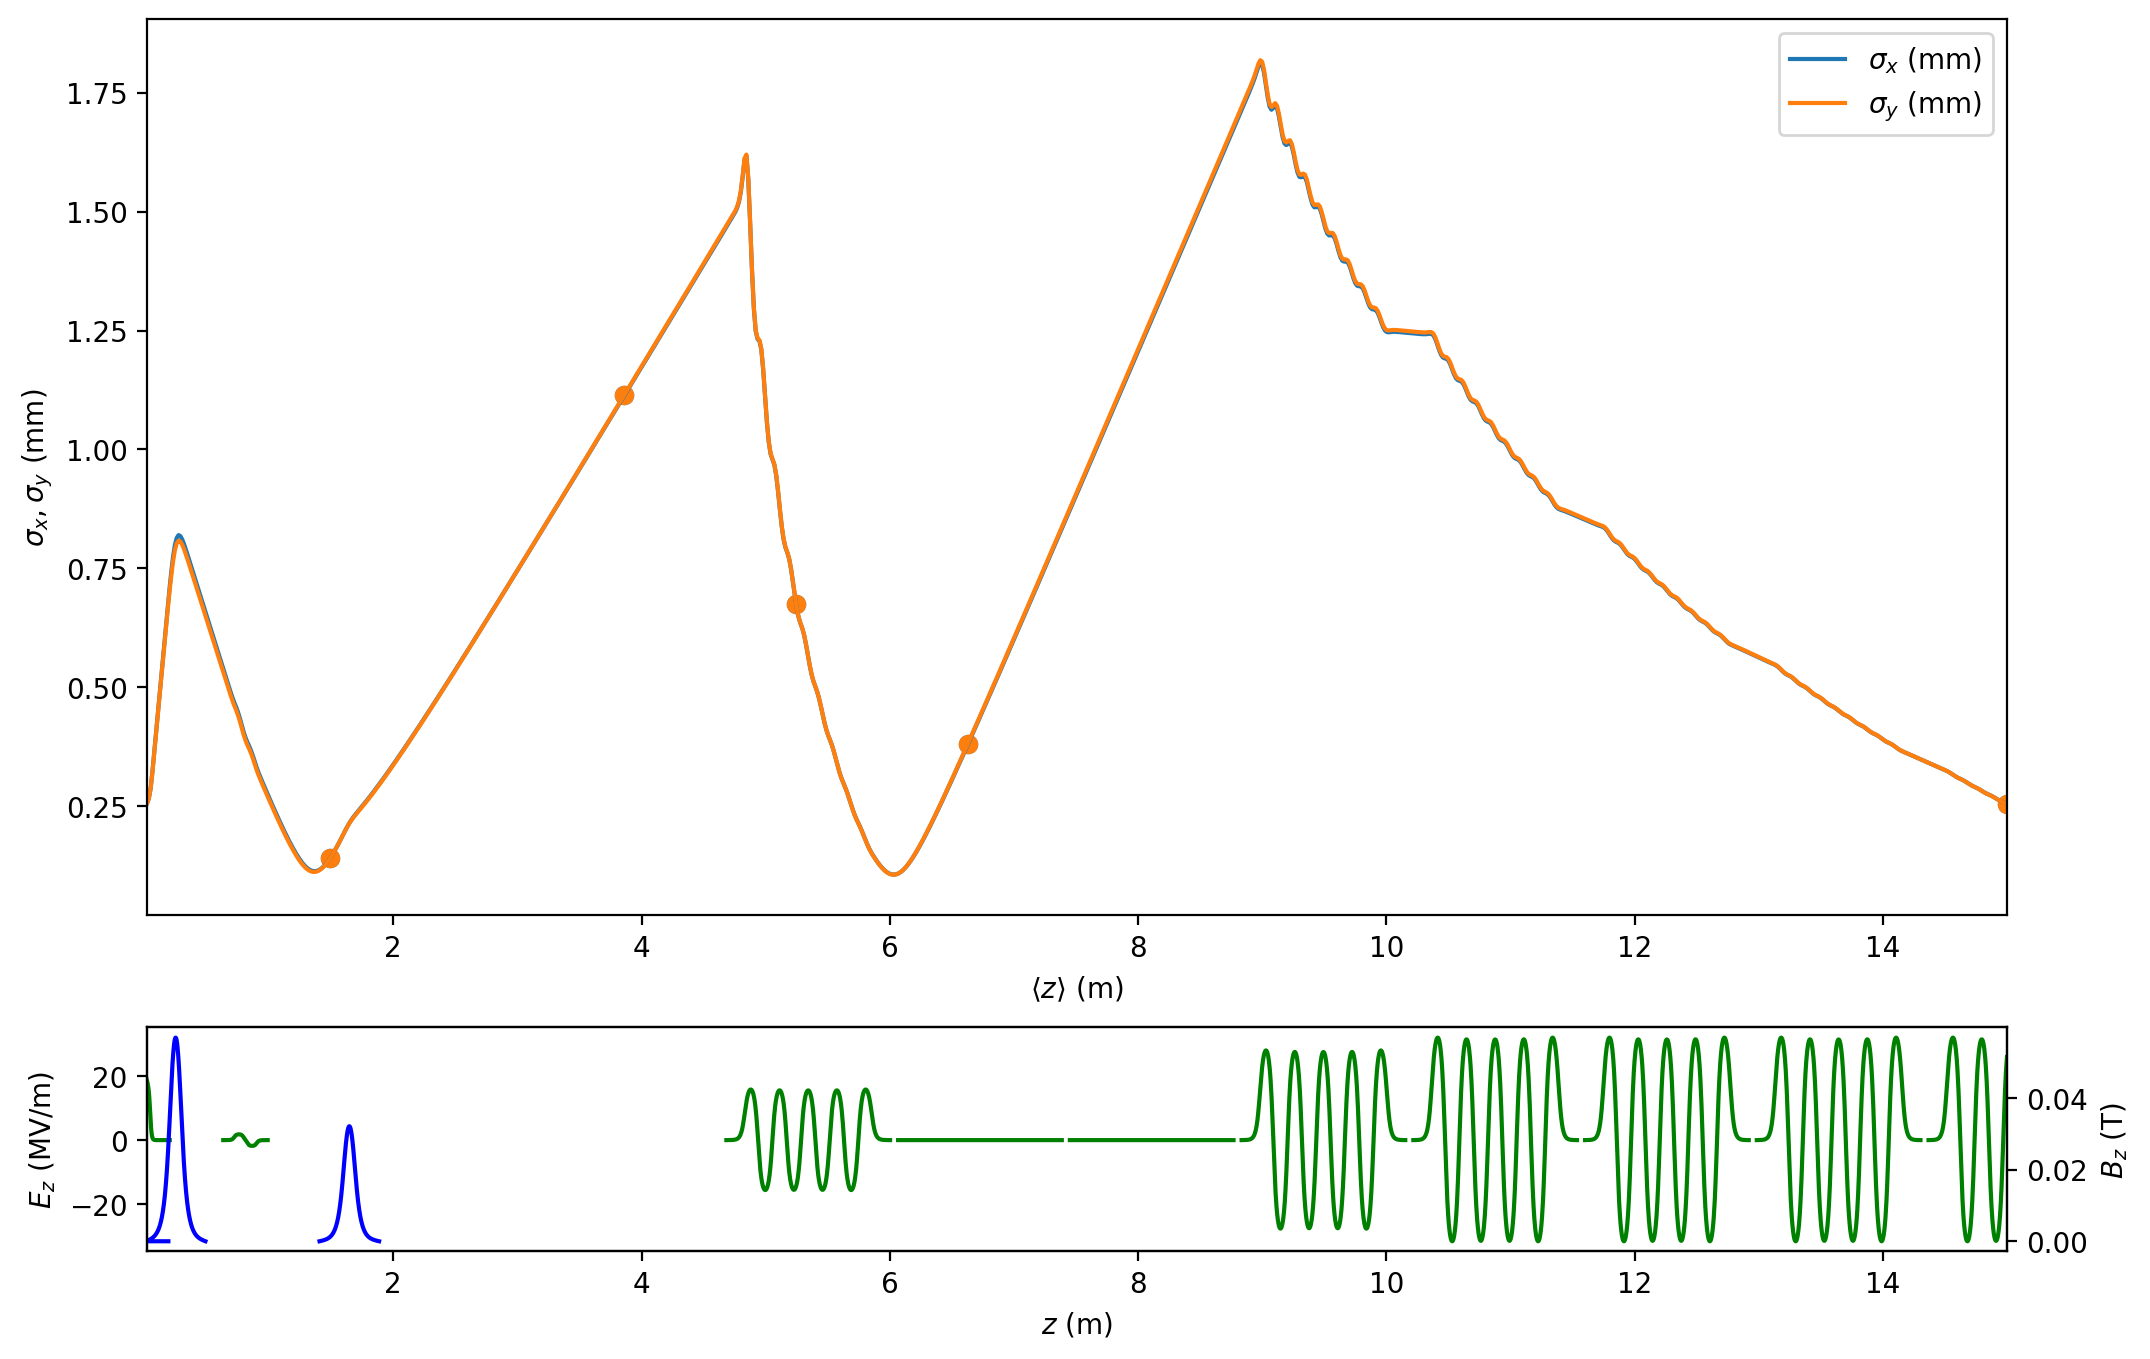

In [12]:
# Double check this
afile = A2.archive()
A3 = Astra.from_archive(afile)
A3.plot()

In [13]:
from ipywidgets import interact

def f(x):
    A['cryomodule:offset'] = x
    A.plot(xlim=(0,20))
interact(f, x=(0,3, .01));

interactive(children=(FloatSlider(value=1.0, description='x', max=3.0, step=0.01), Output()), _dom_classes=('w…